### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
tf.random.set_seed(42)

In [214]:
tf.__version__

'2.0.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [217]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
train_Y = tf.keras.utils.to_categorical(trainY)
test_Y = tf.keras.utils.to_categorical(testY)

In [219]:
print(train_Y.shape)
print('First 5 examples now are: ', train_Y[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

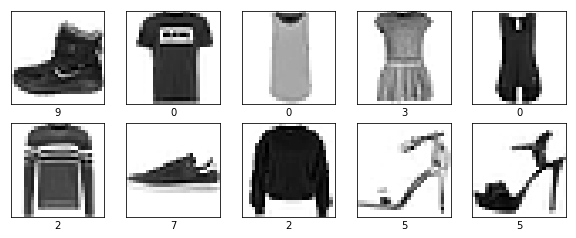

In [220]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(trainY[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [221]:
print(trainX.shape)

(60000, 28, 28)


In [0]:

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten( input_shape=(28,28)))
model1.add(tf.keras.layers.Dense( 10, activation='softmax'))
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [223]:
model1.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [224]:
model1.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          # epochs=100,
          # batch_size=trainX.shape[0])
          epochs=100,
          # batch_size=32
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 58us/sample - loss: 2011.6727 - accuracy: 0.7401 - val_loss: 1199.9495 - val_accuracy: 0.7971
Epoch 2/100
60000/60000 [==============================] - 3s 53us/sample - loss: 1633.6321 - accuracy: 0.7783 - val_loss: 2663.1756 - val_accuracy: 0.6535
Epoch 3/100
60000/60000 [==============================] - 3s 54us/sample - loss: 1537.2961 - accuracy: 0.7866 - val_loss: 1683.3549 - val_accuracy: 0.7954
Epoch 4/100
60000/60000 [==============================] - 3s 53us/sample - loss: 1490.8963 - accuracy: 0.7896 - val_loss: 936.9344 - val_accuracy: 0.8281
Epoch 5/100
60000/60000 [==============================] - 3s 54us/sample - loss: 1464.8133 - accuracy: 0.7960 - val_loss: 1086.2411 - val_accuracy: 0.7955
Epoch 6/100
60000/60000 [==============================] - 3s 53us/sample - loss: 1483.4326 - accuracy: 0.7934 - val_loss: 2105.1294 - val_accuracy: 0.7525
Epoch 7/100
600

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [225]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten( input_shape=(28,28)))
model2.add(tf.keras.layers.Dense( 10, activation='softmax'))
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model2.add(tf.keras.layers.BatchNormalization())
model2.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                7850      
_________________________________________________________________
batch_normalization_3 (Batch (None, 10)                40        
Total params: 7,870
Trainable params: 7,850
Non-trainable params: 20
_________________________________________________________________


### Execute the model

In [226]:
model2.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          # epochs=100,
          # batch_size=trainX.shape[0])
          epochs=100,
          # batch_size=32
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 68us/sample - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/100
60000/60000 [==============================] - 4s 61us/sample - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/100
60000/60000 [==============================] - 4s 61us/sample - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/100
60000/60000 [==============================] - 4s 60us/sample - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/100
60000/60000 [==============================] - 4s 60us/sample - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/100
60000/60000 [==============================] - 4s 60us/sample - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/100
60000/60000 [==============================] - 4s 60us/sample - loss: nan 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [227]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Flatten( input_shape=(28,28)))
model3.add(tf.keras.layers.Dense( 10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.001)
model3.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [228]:
model3.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          # epochs=100,
          # batch_size=trainX.shape[0])
          epochs=100,
          # batch_size=32
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 60us/sample - loss: 203.7202 - accuracy: 0.7383 - val_loss: 140.6255 - val_accuracy: 0.7853
Epoch 2/100
60000/60000 [==============================] - 4s 59us/sample - loss: 162.4096 - accuracy: 0.7789 - val_loss: 256.2897 - val_accuracy: 0.6614
Epoch 3/100
60000/60000 [==============================] - 3s 57us/sample - loss: 156.0925 - accuracy: 0.7853 - val_loss: 232.0942 - val_accuracy: 0.7960
Epoch 4/100
60000/60000 [==============================] - 3s 55us/sample - loss: 150.4687 - accuracy: 0.7886 - val_loss: 96.1674 - val_accuracy: 0.8224
Epoch 5/100
60000/60000 [==============================] - 3s 55us/sample - loss: 148.9167 - accuracy: 0.7936 - val_loss: 185.8604 - val_accuracy: 0.7632
Epoch 6/100
60000/60000 [==============================] - 3s 55us/sample - loss: 147.9134 - accuracy: 0.7933 - val_loss: 131.8100 - val_accuracy: 0.7761
Epoch 7/100
60000/60000 [==

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [229]:
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Flatten( input_shape=(28,28)))
model4.add(tf.keras.layers.Dense( 100, activation='sigmoid'))
model4.add(tf.keras.layers.Dense( 100, activation='sigmoid'))
model4.add(tf.keras.layers.Dense( 10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.03)
model4.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_36 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_37 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [230]:
model4.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          # epochs=100,
          # batch_size=trainX.shape[0])
          epochs=100,
          # batch_size=32
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 103us/sample - loss: 1.1578 - accuracy: 0.6386 - val_loss: 0.9156 - val_accuracy: 0.7027
Epoch 2/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.8307 - accuracy: 0.7130 - val_loss: 0.7999 - val_accuracy: 0.6891
Epoch 3/100
60000/60000 [==============================] - 5s 87us/sample - loss: 0.8283 - accuracy: 0.7039 - val_loss: 0.8113 - val_accuracy: 0.7097
Epoch 4/100
60000/60000 [==============================] - 5s 88us/sample - loss: 0.8789 - accuracy: 0.6836 - val_loss: 0.9077 - val_accuracy: 0.6707
Epoch 5/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.9048 - accuracy: 0.6659 - val_loss: 0.8699 - val_accuracy: 0.6675
Epoch 6/100
60000/60000 [==============================] - 5s 90us/sample - loss: 0.9420 - accuracy: 0.6546 - val_loss: 0.9585 - val_accuracy: 0.6655
Epoch 7/100
60000/60000 [========================

## Review model

In [0]:
test_loss1, test_accuracy1 = model1.evaluate(testX,  test_Y)
test_loss2, test_accuracy2 = model2.evaluate(testX,  test_Y)
test_loss3, test_accuracy3 = model3.evaluate(testX,  test_Y)
test_loss4, test_accuracy4 = model4.evaluate(testX,  test_Y)
predictions1 = model1.predict(testX)
predictions2 = model1.predict(testX)
predictions3 = model1.predict(testX)
predictions4 = model1.predict(testX)

In [0]:
print 'Model 1.Neural Network with a cross entropy loss function and sgd optimizer - 1 Dense layer :                                                                Test accuracy =', round(test_accuracy1,2)
print 'Model 2.Neural Network with a cross entropy loss function and sgd optimizer - 1 Dense layer + Batch Normalization layer:                                     Test accuracy =', round(test_accuracy2,2)
print 'Model 3.Neural Network with a cross entropy loss function and sgd optimizer - 1 Dense layer + Customized the learning rate of 0.001:                         Test accuracy =', round(test_accuracy3,2)
print 'Model 4.Neural Network with a cross entropy loss function and sgd optimizer - 3 Dense layers with 100,100,10 neurons + Customized the learning rate of 0.03: Test accuracy =', round(test_accuracy3,2)

Model 1.Neural Network with a cross entropy loss function and sgd optimizer - 1 Dense layer :                                                                Test accuracy = 0.77
Model 2.Neural Network with a cross entropy loss function and sgd optimizer - 1 Dense layer + Batch Normalization layer:                                     Test accuracy = 0.1
Model 3.Neural Network with a cross entropy loss function and sgd optimizer - 1 Dense layer + Customized the learning rate of 0.001:                         Test accuracy = 0.72
Model 4.Neural Network with a cross entropy loss function and sgd optimizer - 3 Dense layers with 100,100,10 neurons + Customized the learning rate of 0.03: Test accuracy = 0.72


In [0]:
print 'actual label of a sample test record =', testY[1], ', Model 1. Predicted label of the same sample  =', np.argmax(predictions1[1])
print 'actual label of a sample test record =', testY[1], ', Model 2. Predicted label of the same sample  =', np.argmax(predictions2[1])
print 'actual label of a sample test record =', testY[1], ', Model 3. Predicted label of the same sample  =', np.argmax(predictions3[1])
print 'actual label of a sample test record =', testY[1], ', Model 4. Predicted label of the same sample  =', np.argmax(predictions4[1])

actual label of a sample test record = 2 , Model 1. Predicted label of the same sample  = 2
actual label of a sample test record = 2 , Model 2. Predicted label of the same sample  = 2
actual label of a sample test record = 2 , Model 3. Predicted label of the same sample  = 2
actual label of a sample test record = 2 , Model 4. Predicted label of the same sample  = 2


Model 1 (Neural Network with a cross entropy loss function and sgd optimizer - 1 Dense layer), is the best among the four model options. 

### Run the model

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten( input_shape=(28,28)))
model.add(tf.keras.layers.Dense( 10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, train_Y, validation_data=(testX, test_Y), epochs=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 60us/sample - loss: 2033.8556 - accuracy: 0.7394 - val_loss: 1272.5070 - val_accuracy: 0.7985
Epoch 2/100
60000/60000 [==============================] - 3s 55us/sample - loss: 1602.6584 - accuracy: 0.7797 - val_loss: 2638.2994 - val_accuracy: 0.6439
Epoch 3/100
60000/60000 [==============================] - 3s 54us/sample - loss: 1580.5575 - accuracy: 0.7849 - val_loss: 2916.9595 - val_accuracy: 0.7711
Epoch 4/100
60000/60000 [==============================] - 3s 56us/sample - loss: 1509.9831 - accuracy: 0.7888 - val_loss: 1045.5201 - val_accuracy: 0.8179
Epoch 5/100
60000/60000 [==============================] - 4s 62us/sample - loss: 1501.8949 - accuracy: 0.7929 - val_loss: 1453.9256 - val_accuracy: 0.7931
Epoch 6/100
60000/60000 [==============================] - 3s 58us/sample - loss: 1502.5458 - accuracy: 0.7931 - val_loss: 1002.8188 - val_accuracy: 0.8135
Epoch 7/100
60

In [0]:
predictions = model.predict(testX)

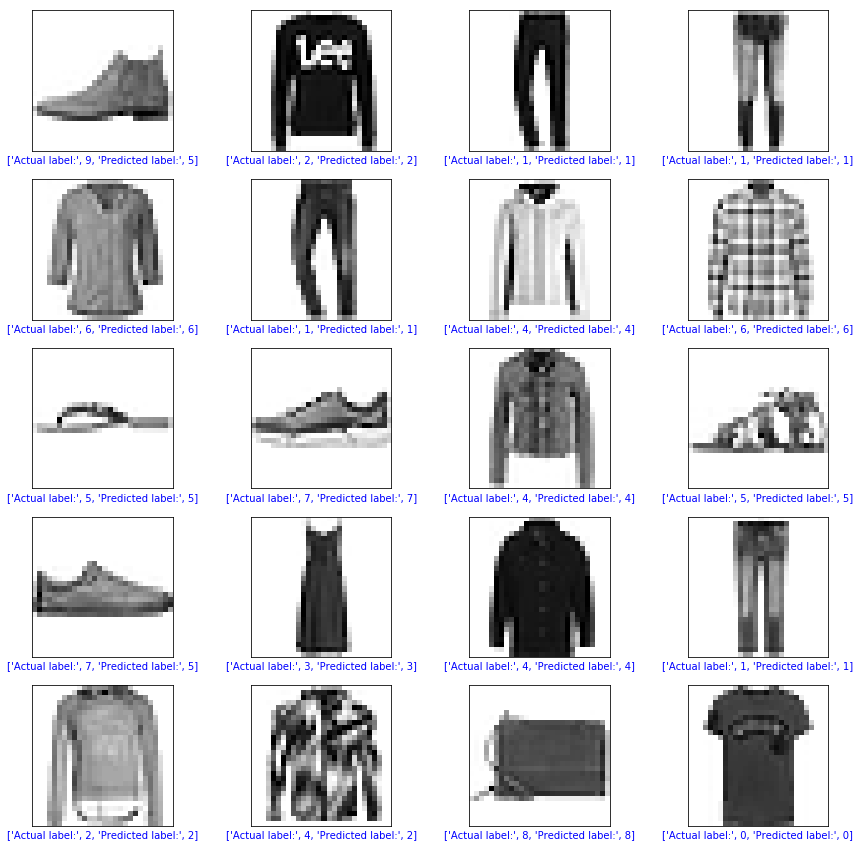

In [0]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testX[i], cmap=plt.cm.binary)
    plt.xlabel(['Actual label:', testY[i], 'Predicted label:', np.argmax(predictions[i])], color="blue" )
plt.show()